In [32]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm


In [35]:
# Define paths to real and fake image directories
real_images_path = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/0/real'
fake_images_path = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/0/fake'

# List all image files in the real and fake directories
real_image_files = [f for f in os.listdir(real_images_path) if os.path.isfile(os.path.join(real_images_path, f))]
fake_image_files = [f for f in os.listdir(fake_images_path) if os.path.isfile(os.path.join(fake_images_path, f))]



In [36]:
# Function to load an image
def load_image(file_path):
    image = cv2.imread(file_path)
    return image

# Load all real and fake images
real_images = [load_image(os.path.join(real_images_path, file)) for file in real_image_files]
fake_images = [load_image(os.path.join(fake_images_path, file)) for file in fake_image_files]


In [37]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in an image
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

# Detect faces in all real and fake images
real_detected_faces = [detect_faces(image) for image in real_images]
fake_detected_faces = [detect_faces(image) for image in fake_images]


In [38]:
# Directories to save cropped faces for real and fake images
real_cropped_faces_dir = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/face_detection/real'
fake_cropped_faces_dir = 'C:/Users/ADITHA/Documents/Deep Fake Detection/train/Preprocessed/face_detection/fake'
os.makedirs(real_cropped_faces_dir, exist_ok=True)
os.makedirs(fake_cropped_faces_dir, exist_ok=True)

# Function to save cropped faces
def save_cropped_faces(image, faces, file_name, save_dir):
    for i, (x, y, w, h) in enumerate(faces):
        face = image[y:y+h, x:x+w]
        face_file_name = os.path.join(save_dir, f'{os.path.splitext(file_name)[0]}_face_{i}.jpg')
        cv2.imwrite(face_file_name, face)

# Save faces for all real images
for file_name, image, faces in zip(real_image_files, real_images, real_detected_faces):
    save_cropped_faces(image, faces, file_name, real_cropped_faces_dir)

# Save faces for all fake images
for file_name, image, faces in zip(fake_image_files, fake_images, fake_detected_faces):
    save_cropped_faces(image, faces, file_name, fake_cropped_faces_dir)


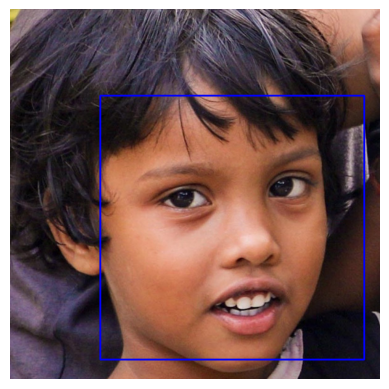

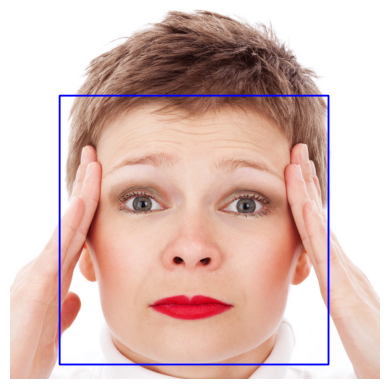

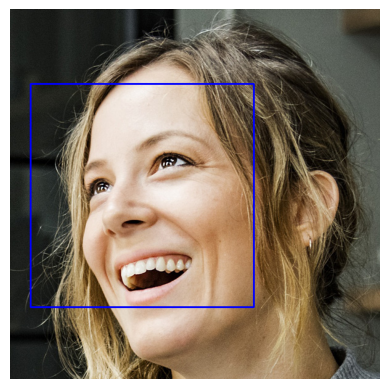

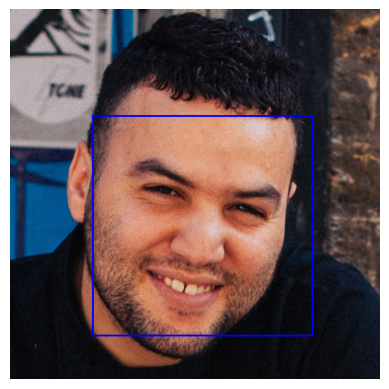

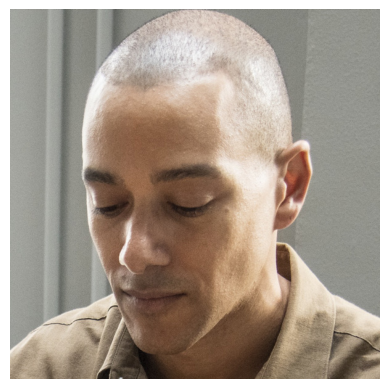

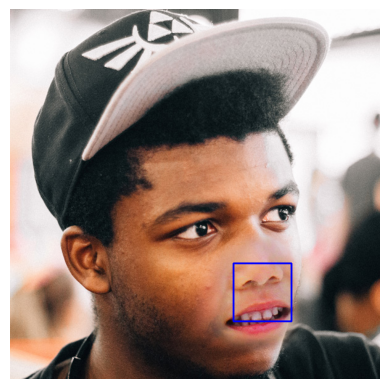

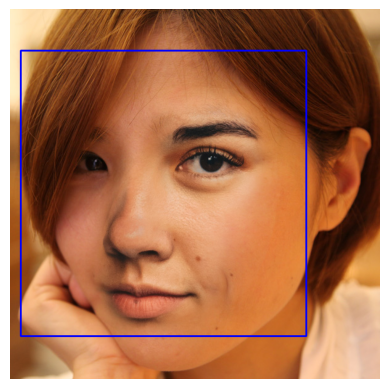

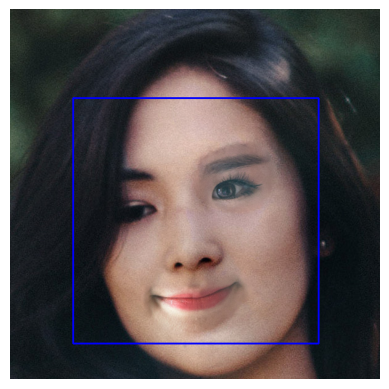

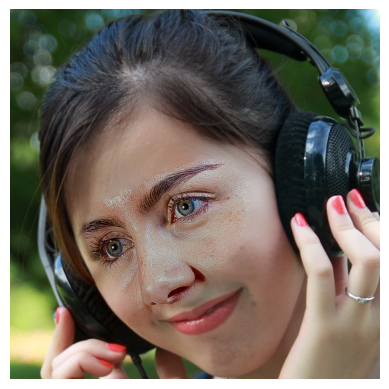

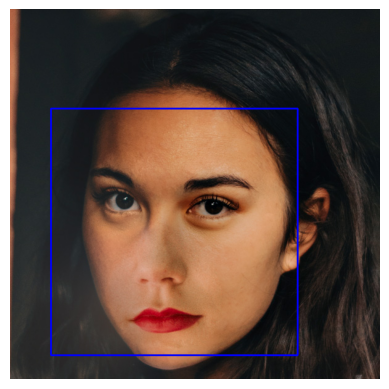

In [39]:
# Function to display an image with detected faces
def display_image_with_faces(image, faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Display some results for real images
for i in range(5):
    display_image_with_faces(real_images[i], real_detected_faces[i])

# Display some results for fake images
for i in range(5):
    display_image_with_faces(fake_images[i], fake_detected_faces[i])
